In [1]:
from astropy.table import vstack,Table,Column
import matplotlib.pyplot as plt
import numpy as np
import sncosmo

path='../results/SDSS_Data/SMP_'
master_table=Table.read('../results/SDSS_Data/master_data.txt',format='ascii')

In [5]:
def filt(l):
    f=[]
    for i in l:
        f.append('sdss'+'ugriz'[i])
    return f

def get_cid_table(cid):
    """ get data table of a certain cid """
    table=Table.read(path+str(cid).zfill(6)+'.dat',format='ascii',header_start=3,data_start=0)
    bands=filt(table['FILT'])
    zp=np.zeros(len(table))+25.0
    zpsys=np.full(len(table),'ab')
    SN_table=Table([table['MJD'],bands,table['FLUX'],table['FLUXERR'],zp,zpsys],names=['time','band','flux','fluxerr','zp','zpsys'])
    meta_data=master_table[master_table['CID']==cid]
    SN_table.meta['z']=meta_data['zspecHelio']
    return SN_table

def sncosmo_fit(cid):
    """ do light curve fit for a certain cid """
    model=sncosmo.Model(source='salt2')
    data=get_cid_table(cid)
    # creat SALT2 model
    model=sncosmo.Model(source='salt2')
    if data.meta['z']!=-9:
        model.set(z=data.meta['z'])
        fit_params=['t0', 'x0', 'x1', 'c']
        bounds=None
    else:
        fit_params=['z', 't0', 'x0', 'x1', 'c']
        bounds={'z':(0.02, 1)}
    # run the fit
    result, fitted_model = sncosmo.fit_lc(data, model,fit_params, bounds=bounds)
    return data, result, fitted_model


/anaconda3/lib/python3.6/site-packages/sncosmo/fitting.py:160: RuntimeWarning: Dropping following bands from data: sdssg, sdssz, sdssu(out of model wavelength range)
  "(out of model wavelength range)", RuntimeWarning)


696


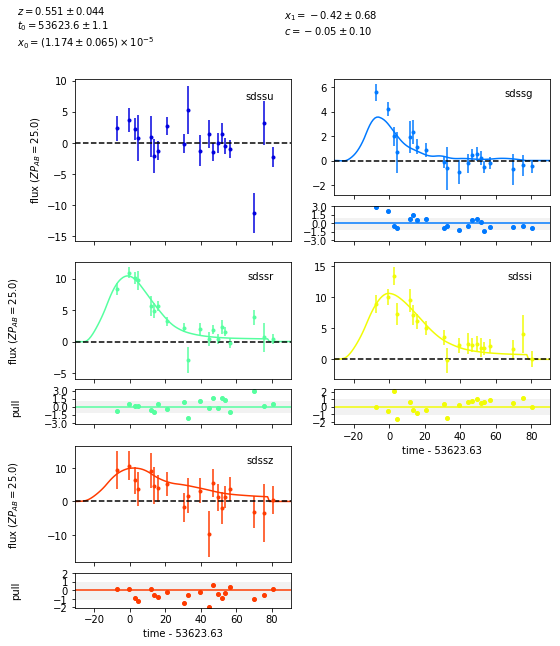

In [66]:
# fit one light curve
cid=master_table['CID'][10]
data,result,fitted_model=sncosmo_fit(cid)
sncosmo.plot_lc(data,model=fitted_model,errors=result.errors)
print(cid)

In [31]:
# creat table for SNcosmo fit results
SN_fit=Table([[]]*12,names=['CID','z','t0','x0','x1','c','zerr','t0err','x0err','x1err','cerr','chi^2'])

# fit a number of light curves
for cid in master_table['CID'][0:20]:
    t=[(cid)]
    try:
        data,result,fitted_model=sncosmo_fit(cid)
        for i in result.parameters:
            t.append(format(i,'.4f'))
        # set z_err as None if z was set
        if len(result.errors)!=5:
            t.append(None)
        for p in result.errors:
            t.append(format(result.errors[p],'.4f'))
        t.append(format(result.chisq,'.4f'))
        SN_fit.add_row(t)
    except:
        continue


/anaconda3/lib/python3.6/site-packages/sncosmo/fitting.py:160: RuntimeWarning: Dropping following bands from data: sdssz(out of model wavelength range)
  "(out of model wavelength range)", RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/sncosmo/fitting.py:160: RuntimeWarning: Dropping following bands from data: sdssg, sdssz, sdssu(out of model wavelength range)
  "(out of model wavelength range)", RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/sncosmo/fitting.py:160: RuntimeWarning: Dropping following bands from data: sdssu(out of model wavelength range)
  "(out of model wavelength range)", RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/sncosmo/models.py:697: RuntimeWarning: overflow encountered in power
  10. ** (-0.4 * self._colorlaw(wave) * self._parameters[2]))
/anaconda3/lib/python3.6/site-packages/sncosmo/models.py:697: RuntimeWarning: invalid value encountered in multiply
  10. ** (-0.4 * self._colorlaw(wave) * self._parameters[2]))
/anaconda3/lib/python3.

In [32]:
SN_fit['CID','x1','x1err','c','cerr','chi^2']

CID,x1,x1err,c,cerr,chi^2
float64,float64,float64,float64,float64,float64
679.0,-0.8074,0.958,0.9702,0.3077,139.346
680.0,28.9439,7.9957,0.3244,0.123,184.1443
685.0,19.5333,4.6282,-0.2295,0.0481,280.8334
688.0,1.3347,0.837,0.5805,0.1358,160.9072
689.0,6.359,0.8856,-0.01,0.0664,397.315
691.0,-0.1155,0.3629,-0.004,0.0593,341.8601
692.0,6.1578,0.7253,1.0478,0.0514,575.7539
694.0,0.8525,0.1432,0.3354,0.0116,1015.5584
695.0,-1.2957,0.1286,0.7299,0.188,724.8192
